# Predicting Car Prices using KNN Algorithm

In this project, we follow the standard machine learning workflow to predict a car's market price using its attributes by leveraging the k-nearest neighbors algorithm.

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). 

## Introduction to the Data

Let's start by exploring the data and getting to know the features

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99

In [2]:
# Adding columns from the data dictionary since the datafile does not have column headers
cols=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data",names=cols)

In [3]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [5]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
cars_trimmed=cars[['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']]

In [6]:
cars_trimmed

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
201,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
202,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
203,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


## Data Cleaning

In [7]:
cars_trimmed=cars_trimmed.replace("?",np.nan)

In [8]:
cars_trimmed=cars_trimmed.astype('float')

In [9]:
cars_trimmed.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values
cars_trimmed=cars_trimmed.dropna(subset=['price'])

In [11]:
cars_trimmed.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [12]:
# Imputing missing values with column means
cars_trimmed=cars_trimmed.fillna(cars_trimmed.mean())

In [13]:
cars_trimmed

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [14]:
cars_trimmed.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
## Normalizing all columns except the price column ( target ) so that they all fall within the 0 to 1 range

price=cars_trimmed['price']
cars_trimmed=(cars_trimmed-cars_trimmed.mean())/cars_trimmed.std()
cars_trimmed['price']=price

In [16]:
cars_trimmed

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.843849,1.698379,1.184775,1.432780,0.708112,0.766162,0.339963,1.676004,-0.338251,-0.165864,0.283764,0.590680,-0.339254,-0.394205,16845.0
201,-0.843849,1.698379,1.184775,1.385194,0.708112,0.953676,0.339963,1.676004,-0.338251,-0.365616,1.514843,0.381525,-0.961995,-0.834401,19045.0
202,-0.843849,1.698379,1.184775,1.432780,0.708112,0.882150,1.110178,0.929935,-1.224194,-0.340647,0.819016,0.799836,-1.117680,-1.127865,21485.0
203,-0.843849,1.698379,1.184775,1.432780,0.708112,1.278441,0.436240,-1.196361,0.452769,3.204952,0.069663,-0.664253,0.127801,-0.540937,22470.0


## Univariate Model

Now that we have a clean dataset, let's train the k-nn model on each feature and see how good they are in individually predicting the car prices. We will be using RMSE as our error metric.

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = cars_trimmed.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars_trimmed)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3297.699744
horsepower           4047.376555
curb-weight          4453.680703
highway-mpg          4625.047587
city-mpg             4754.637378
width                4772.510209
length               5429.644740
wheel-base           5461.490336
compression-rate     6606.571346
bore                 6793.057484
normalized-losses    7337.284820
peak-rpm             7643.070323
stroke               8006.096427
height               8132.467732
dtype: float64

Looks like predictions based on engine size and horsepower have the lowest RMSE rate, indicating that they are good predictors for car prices. Let's try training our model on different k values to see how the RMSE value differs.

In [18]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
                
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = cars_trimmed.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars_trimmed)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 7779.606037519503,
  3: 7480.692360872743,
  5: 7337.2848203845515,
  7: 7795.000930504562,
  9: 7705.82454665913},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.490335934409,
  7: 5448.173408324034,
  9: 5738.621574471594},
 'length': {1: 4577.003915399697,
  3: 5087.460276710444,
  5: 5429.644739577333,
  7: 5307.702178308323,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.421075087697,
  5: 4772.510209128695,
  7: 4715.979827895643,
  9: 4736.091903473983},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8132.467731772246,
  7: 7704.344964170201,
  9: 7779.56469282989},
 'curb-weight': {1: 5288.0195725810245,
  3: 5011.8789151002,
  5: 4453.680702653493,
  7: 4330.149364501495,
  9: 4632.92525121302},
 'engine-size': {1: 3227.659787364569,
  3: 2946.7417879781224,
  5: 3297.6997444813674,
  7: 3563.43509928404,
  9: 3831.764970642862},
 'bore': {1: 8602.58848450066,
  3: 6977.123411794459,
  5: 67

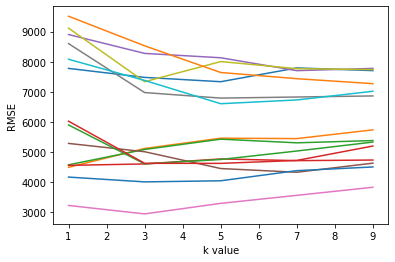

In [19]:

import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

We can see that increasing the K value had different effects on the RMSE values for different features. While the RMSE value for some features like compression rate, stroke, bore reduced as we increased the K value, this effect was not consistent across all features. 

In [20]:
mean_dict={}
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    mean_dict[k]=np.mean(y)
   
    

In [21]:
# calculating the mean RMSE across all k values for each feature.
mean_dict
new_dict={}
for x,y in mean_dict.items():
    new_dict[y]=x
sorted(new_dict.items())

[(3373.460277950192, 'engine-size'),
 (4223.530357284321, 'horsepower'),
 (4678.052062707216, 'width'),
 (4743.330761209846, 'curb-weight'),
 (5040.509230448393, 'highway-mpg'),
 (5126.5159907363395, 'city-mpg'),
 (5156.973124965849, 'length'),
 (5252.436178721009, 'wheel-base'),
 (7164.249800221235, 'compression-rate'),
 (7213.387242726885, 'bore'),
 (7619.681739188098, 'normalized-losses'),
 (7993.732370042334, 'stroke'),
 (8078.8223746725, 'peak-rpm'),
 (8159.606697635713, 'height')]

## Multivariate Model

Let's now try to evaluate the effect of multiple features on predicting car prices. We will start with using all features except the target, to predict the car prices

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[train_col], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[train_col])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse


train_cols = cars_trimmed.columns.drop('price')

# For all columns (minus `price`), train a model, return RMSE value

rmse_val = knn_train_test(train_cols, 'price', cars_trimmed)



In [23]:
print(rmse_val)

3730.068922889355


Not bad! Let's now to try select some of the features that came out at the top during the univariate training step, and see how they are faring at predicting car prices.

In [24]:
## Retraining the model using the 2 best features as observed during univariate training step
train_cols=['engine-size','horsepower']
rmse_val_2_best = knn_train_test(train_cols, 'price', cars_trimmed)
## Retraining the model using the 2 best features as observed during univariate training step
train_cols=['engine-size','horsepower','width']
rmse_val_3_best = knn_train_test(train_cols, 'price', cars_trimmed)
## Retraining the model using the 2 best features as observed during univariate training step
train_cols=['engine-size','horsepower','width','curb-weight']
rmse_val_4_best = knn_train_test(train_cols, 'price', cars_trimmed)
## Retraining the model using the 2 best features as observed during univariate training step
train_cols=['engine-size','horsepower','width','curb-weight','highway-mpg']
rmse_val_5_best = knn_train_test(train_cols, 'price', cars_trimmed)
print('RMSE 2 best:',rmse_val_2_best)
print('RMSE 3 best:',rmse_val_3_best)
print('RMSE 4 best:',rmse_val_4_best)
print('RMSE 5 best:',rmse_val_5_best)

RMSE 2 best: 2938.1306900277887
RMSE 3 best: 3576.5381752208214
RMSE 4 best: 3435.145837075945
RMSE 5 best: 3457.4725012114936


In [25]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [x for x in range(1,26)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_col])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
                
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols={"2 best feature" : ['engine-size','horsepower'],
            "4 best feature" : ['engine-size','horsepower','width','curb-weight'],
            "5 best feature" : ['engine-size','horsepower','width','curb-weight','highway-mpg']
           }
for title,col in train_cols.items():
    rmse_val = knn_train_test(col, 'price', cars_trimmed)
    k_rmse_results[title] = rmse_val

k_rmse_results



{'2 best feature': {1: 2824.8287076781794,
  2: 2615.442453055988,
  3: 2676.6521480521455,
  4: 2831.7841198370656,
  5: 2938.1306900277887,
  6: 3128.516968715745,
  7: 3204.0554389097565,
  8: 3459.8826047221833,
  9: 3715.847780310613,
  10: 3980.307424292901,
  11: 4151.348212046468,
  12: 4231.233582321214,
  13: 4321.751665703992,
  14: 4366.489859575597,
  15: 4487.120412964203,
  16: 4591.609216968047,
  17: 4683.284404125849,
  18: 4739.084337496269,
  19: 4784.099214347852,
  20: 4777.706746763483,
  21: 4816.3918959481325,
  22: 4806.480777296786,
  23: 4832.819314595003,
  24: 4883.724636768665,
  25: 4975.5110313113555},
 '4 best feature': {1: 2734.943456978825,
  2: 3094.990917547735,
  3: 3079.4233224582636,
  4: 3207.401445627884,
  5: 3435.145837075945,
  6: 3644.905717919087,
  7: 3639.209218512767,
  8: 3801.0236825048687,
  9: 3839.0853087451715,
  10: 3966.8524862569284,
  11: 4081.4936853188447,
  12: 4203.255322342342,
  13: 4280.433926612317,
  14: 4312.7621482

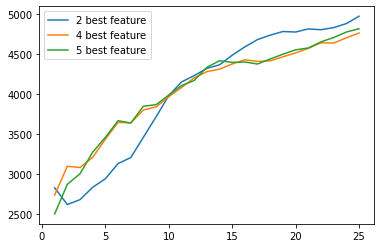

In [26]:
for key,val in k_rmse_results.items():
    x=list(val.keys())
    y=list(val.values())
    plt.plot(x,y,label=key)
plt.legend()


Looks like our model had the lowest RMSE when using 'engine-size','horsepower','width','curb-weight','highway-mpg' and with k as 1. 

## Conclusion

In this project, we experimented with K-nearest Neighbor Regression and tuned the model with different features and k values.We found that each feature responds differently to different k-values and there is no one magic K value that does the trick. Different combinations of features respond differently to different k-values. We can further improve the model but doing some feature engineering and using some of the categorical variables which we left out.